In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [2]:
anime = pd.read_csv('anime.csv')

In [3]:
rating = pd.read_csv('rating.csv')

In [4]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [6]:
df = pd.merge(rating, anime, on='anime_id')

In [7]:
df.head()

,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,6,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
4,10,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7813727 entries, 0 to 7813726
Data columns (total 9 columns):
user_id     int64
anime_id    int64
rating_x    int64
name        object
genre       object
type        object
episodes    object
rating_y    float64
members     int64
dtypes: float64(1), int64(4), object(4)
memory usage: 596.1+ MB


In [9]:
sns.set_style('white')

In [10]:
df[df['rating_x']>=0].groupby('name')['rating_x'].mean().sort_values(ascending=False).head()

name
What&#039;s Michael? (TV)                  10.0
Hello Kitty no Circus ga Yatte Kita        10.0
Yokohama Meibutsu: Otoko Katayama-gumi!    10.0
Midoriyama Koukou Koushien-hen             10.0
Asari-chan: Ai no Marchen Shoujo           10.0
Name: rating_x, dtype: float64

In [11]:
df[df['rating_x']>=0].groupby('name')['rating_x'].count().sort_values(ascending=False).head()

name
Death Note                         34226
Sword Art Online                   26310
Shingeki no Kyojin                 25290
Code Geass: Hangyaku no Lelouch    24126
Angel Beats!                       23565
Name: rating_x, dtype: int64

In [12]:
anime_rate = pd.DataFrame(df[df['rating_x']>=0].groupby('name')['rating_x'].mean())

In [13]:
anime_rate['num of ratings'] = pd.DataFrame(df[df['rating_x']>=0].groupby('name')['rating_x'].count())

In [14]:
anime_rate.head()

,rating_x,num of ratings
name,,
&quot;0&quot;,4.764706,17
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",1.000000,1
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,7.343307,635
&quot;Bungaku Shoujo&quot; Memoire,7.744713,662
&quot;Bungaku Shoujo&quot; Movie,7.840154,1295


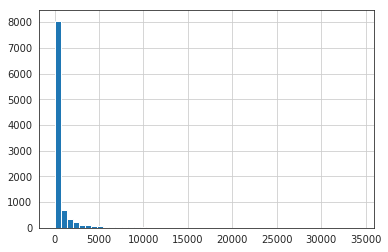

In [15]:
anime_rate['num of ratings'].hist(bins=50)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


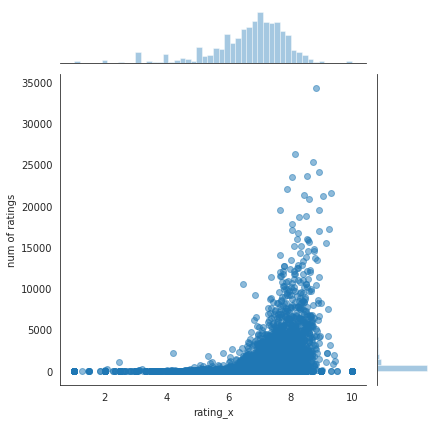

In [16]:
sns.jointplot(x='rating_x',y='num of ratings',data=anime_rate,alpha=0.5)

In [17]:
df.head()

,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,6,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
4,10,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297


In [18]:
anime_rate.head()

,rating_x,num of ratings
name,,
&quot;0&quot;,4.764706,17
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",1.000000,1
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,7.343307,635
&quot;Bungaku Shoujo&quot; Memoire,7.744713,662
&quot;Bungaku Shoujo&quot; Movie,7.840154,1295


In [19]:
comp = pd.merge(anime_rate,anime,on='name')

In [20]:
C = comp['rating_x'].mean()

In [21]:
m = comp['num of ratings'].quantile(0.90)

In [22]:
comp1 = comp.copy().loc[comp['num of ratings']>=m]

In [23]:
comp1.shape

(993, 9)

In [24]:
def weighted_rating(x, m=m, C=C):
    v = x['num of ratings']
    R = x['rating_x']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [25]:
comp1['score'] = comp1.apply(weighted_rating,axis=1)

In [26]:
comp1 = comp1.sort_values('score',ascending=False)

In [27]:
import string
def clean_data(x):
    return x.replace(',','')

In [28]:
x = 'Action, Adventure, Drama, Fantasy, Magic'
clean_data(x)

'Action Adventure Drama Fantasy Magic'

In [29]:
comp1['genre'] = comp1['genre'].apply(clean_data)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(comp1['genre'])

In [31]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [32]:
comp1 = comp1.reset_index()
indices = pd.Series(comp1['name'])

In [33]:
indices = pd.Series(comp1.index, index=comp1['name']).drop_duplicates()

In [34]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return comp1['name'].iloc[movie_indices]

In [35]:
title = 'Naruto'
recomendations = get_recommendations(title,cosine_sim2)

In [36]:
def exclude_derivative(x,y):
    if x in y:
        return None
    else:
        return y

In [37]:
result = recomendations.apply(lambda x: exclude_derivative(title,x)).dropna()

In [38]:
result

80                                         Dragon Ball Z
381                                      Dragon Ball Kai
691                                  Medaka Box Abnormal
831                                           Medaka Box
834                                         Tenjou Tenge
987    Dragon Ball Z Movie 11: Super Senshi Gekiha!! ...
Name: name, dtype: object